In [1]:
# Convert swiss coordinates to lat long 
from pyproj import Transformer 
transformer = Transformer.from_crs("EPSG:21781", "EPSG:4326", always_xy=True)
lon, lat = transformer.transform(628875 , 240185)
print(lat, lon) # copypaste in google maps
# Switzerland bounds ≈ lat 45–48, lon 5–11

47.31191060534512 7.820499571252613


In [2]:
##################################

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Härkingen-A1 (Dec 2024)

## Daily

In [4]:
nox_daily = pd.read_csv("Data/NOX_daily.csv", encoding="latin1", header=4, sep=";")
pm25_daily = pd.read_csv("Data/PM2.5_daily.csv", encoding="latin1", header=4, sep=";")
pm10_daily = pd.read_csv("Data/PM10_daily.csv", encoding="latin1", header=4, sep=";")


In [5]:
nox_daily.head()

,Date/time,Härkingen-A1
0,01.12.2024,57.7
1,02.12.2024,104.6
2,03.12.2024,48.2
3,04.12.2024,41.5
4,05.12.2024,73.4


In [6]:
pm25_daily.head()

,Date/time,Härkingen-A1
0,01.12.2024,19.5
1,02.12.2024,22.9
2,03.12.2024,5.7
3,04.12.2024,6.8
4,05.12.2024,13.4


In [7]:
pm10_daily.head()

,Date/time,Härkingen-A1
0,01.12.2024,15.6
1,02.12.2024,22.7
2,03.12.2024,5.6
3,04.12.2024,6.1
4,05.12.2024,12.4


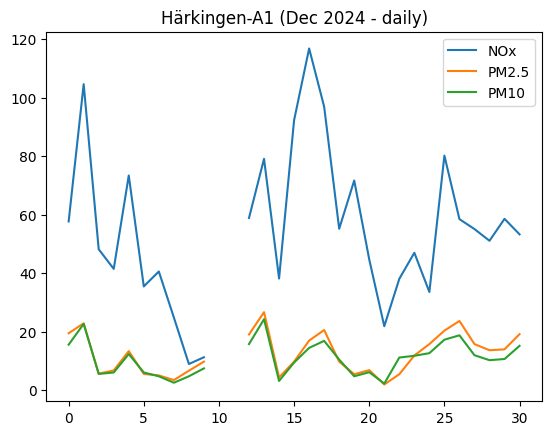

In [8]:
plt.plot(nox_daily["Härkingen-A1"], label="NOx")
plt.plot(pm25_daily["Härkingen-A1"], label="PM2.5")
plt.plot(pm10_daily["Härkingen-A1"], label="PM10")

plt.title("Härkingen-A1 (Dec 2024 - daily)")
plt.legend()
plt.show()

## Hourly

In [9]:
nox_hourly = pd.read_csv("Data/NOX_hourly.csv", encoding="latin1", header=5, sep=";")
pm25_hourly = pd.read_csv("Data/PM2.5_hourly.csv", encoding="latin1", header=5, sep=";")
pm10_hourly = pd.read_csv("Data/PM10_hourly.csv", encoding="latin1", header=5, sep=";")

In [10]:
nox_hourly.head()

,Date/time,Härkingen-A1
0,01.12.2024 01:00,26.4
1,01.12.2024 02:00,26.1
2,01.12.2024 03:00,23.7
3,01.12.2024 04:00,19.8
4,01.12.2024 05:00,19.8


In [11]:
pm25_hourly.head()

,Date/time,Härkingen-A1
0,01.12.2024 01:00,20.1
1,01.12.2024 02:00,21.5
2,01.12.2024 03:00,21.1
3,01.12.2024 04:00,20.3
4,01.12.2024 05:00,20.0


In [12]:
pm10_hourly.head()

,Date/time,Härkingen-A1
0,01.12.2024 01:00,15.5
1,01.12.2024 02:00,16.4
2,01.12.2024 03:00,16.6
3,01.12.2024 04:00,15.4
4,01.12.2024 05:00,15.6


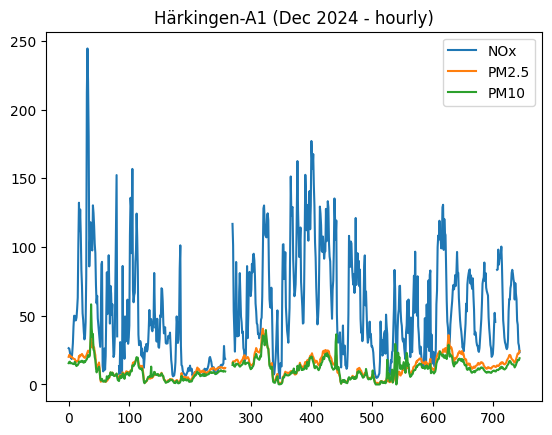

In [13]:
plt.plot(nox_hourly["Härkingen-A1"], label="NOx")
plt.plot(pm25_hourly["Härkingen-A1"], label="PM2.5")
plt.plot(pm10_hourly["Härkingen-A1"], label="PM10")

plt.title("Härkingen-A1 (Dec 2024 - hourly)")
plt.legend()
plt.show()

## Car counter

In [8]:
files = glob.glob("Data/astra/*.xlsx")

In [32]:
def detect_header_row(path, sheet="Monatsmittel", max_check=20):
    # read first 20 rows without header
    preview = pd.read_excel(path, sheet_name=sheet, header=None, nrows=max_check)
    for i, row in preview.iterrows():
        # Convert row to strings (for safety)
        values = row.astype(str).str.lower().tolist()

        # Heuristic: must contain "messstelle" and "datum"
        if any("messstelle" in v for v in values) and any("datum" in v for v in values):
            return i
    return None  # fallback if nothing found

In [37]:
TARGET_COLUMNS = [
    'Nr', 'Messstelle', 'drop', 'Kanton', 'Strasse',
    'Di-Do', 'Mo-Fr', 'Samstage', 'Sonntage', 'Mo-So',
    'Drop_2', 'max', 'DOW_DayInMonthNr', 'drop_4',
    'max_sa', 'DayInMonthNr'
]

all_dfs = []

for file in files:
    header_row = detect_header_row(file)
    df = pd.read_excel(file, sheet_name="Monatsmittel", header=header_row)

    # Force schema length
    if len(df.columns) >= len(TARGET_COLUMNS):
        df = df.iloc[:, :len(TARGET_COLUMNS)]  # keep only first N columns
        df.columns = TARGET_COLUMNS
    else:
        print(f"{file}: not enough columns ({len(df.columns)})")

    # Drop the unwanted ones
    df = df.drop(columns=['drop', 'Drop_2', 'drop_4', 'Kanton', 'Strasse'], errors='ignore')

    # Add filename
    df["source_file"] = file

    # 🔹 Keep only Nr == 60
    df = df[df["Nr"] == 60]

    all_dfs.append(df)

# Join all into one DataFrame
df_all = pd.concat(all_dfs, ignore_index=True)

print("Final joined dataframe shape:", df_all.shape)
print(df_all.head(10))

Final joined dataframe shape: (114, 12)
   Nr    Messstelle          Di-Do  Mo-Fr  Samstage  Sonntage  Mo-So  max  \
0  60  GUNZGEN (AB)   88972.833333    NaN       NaN       NaN    NaN  NaN   
1  60  GUNZGEN (AB)   96047.666667    NaN       NaN       NaN    NaN  NaN   
2  60  GUNZGEN (AB)   97397.583333    NaN       NaN       NaN    NaN  NaN   
3  60  GUNZGEN (AB)   99888.750000    NaN       NaN       NaN    NaN  NaN   
4  60  GUNZGEN (AB)  100463.666667    NaN       NaN       NaN    NaN  NaN   
5  60  GUNZGEN (AB)  103966.071429    NaN       NaN       NaN    NaN  NaN   
6  60  GUNZGEN (AB)  101349.846154    NaN       NaN       NaN    NaN  NaN   
7  60  GUNZGEN (AB)   97722.583333    NaN       NaN       NaN    NaN  NaN   
8  60  GUNZGEN (AB)            NaN    NaN       NaN       NaN    NaN  NaN   
9  60  GUNZGEN (AB)            NaN    NaN       NaN       NaN    NaN  NaN   

  DOW_DayInMonthNr        max_sa  DayInMonthNr                 source_file  
0              NaN           NaN   

In [38]:
df_all

,Nr,Messstelle,Di-Do,Mo-Fr,Samstage,Sonntage,Mo-So,max,DOW_DayInMonthNr,max_sa,DayInMonthNr,source_file
0,60,GUNZGEN (AB),88972.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\2016_02_de.xlsx
1,60,GUNZGEN (AB),96047.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\2016_03_de.xlsx
2,60,GUNZGEN (AB),97397.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\2016_04_de.xlsx
3,60,GUNZGEN (AB),99888.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\2016_05_de.xlsx
4,60,GUNZGEN (AB),100463.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\2016_07_de.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...
109,60,GUNZGEN (AB),100403.133333,100853.869565,103727.50,89257.50,99728.354839,111531.0,FRE / 25,108558.0,26.0,Data/astra\Oktober_2024.xlsx
110,60,GUNZGEN (AB),98133.214286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data/astra\September 2015.xlsx
111,60,GUNZGEN (AB),104456.714286,105684.454545,110164.75,97485.75,105188.666667,117496.0,FRE / 03,112149.0,4.0,Data/astra\September 2021.xlsx
112,60,GUNZGEN (AB),101928.000000,102816.050000,105641.20,94329.60,101872.500000,113503.0,FRE / 07,109106.0,8.0,Data/astra\september-2018.xlsx


In [ ]:

cars = pd.read_excel("Data/Dezember_2024.xlsx", sheet_name="Monatsmittel", header=6)

In [16]:
cars.head()

,No,Messstelle,Unnamed: 2,Kt,Strasse,Anzahl,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Anzahl.1,Datum,Unnamed: 13,Anzahl.2,Datum.1
0,2,CHALET-A-GOBET,NaN,VD,H 1,17573.636364,16638.70,12920.00,10113.285714,14685.387097,NaN,19215,FRE / 06,NaN,14348,7
1,3,BRISSAGO S,NaN,TI,H 13,7704.000000,7697.45,6361.75,4941.714286,6902.838710,NaN,8858,FRE / 20,NaN,7299,14
2,6,"MUTTENZ, A2/ZUBR. SCHAENZLI",NaN,BL,H 18,74837.181818,72684.05,54312.25,42612.285714,63523.096774,NaN,82708,DON / 12,NaN,60161,7
3,9,"BRUENIG, LETZI",NaN,OW,A 8,5484.909091,5833.50,7073.50,7187.857143,6299.322581,NaN,10130,MON / 30,NaN,10850,28
4,14,"JULIER, SILVAPLANA",NaN,GR,H 3,2808.181818,3078.85,3712.25,3809.714286,3325.612903,NaN,5220,FRE / 27,NaN,5567,28


In [17]:
cars[cars["No"] == 60]

,No,Messstelle,Unnamed: 2,Kt,Strasse,Anzahl,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Anzahl.1,Datum,Unnamed: 13,Anzahl.2,Datum.1
26,60,GUNZGEN (AB),NaN,SO,A 1,92287.181818,91359.2,88767.5,77514.571429,87898.580645,NaN,101674,FRE / 13,NaN,93289,21


In [18]:
gunzgen = cars[cars["No"] == 60]

In [19]:
gunzgen

,No,Messstelle,Unnamed: 2,Kt,Strasse,Anzahl,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Anzahl.1,Datum,Unnamed: 13,Anzahl.2,Datum.1
26,60,GUNZGEN (AB),NaN,SO,A 1,92287.181818,91359.2,88767.5,77514.571429,87898.580645,NaN,101674,FRE / 13,NaN,93289,21


In [20]:
gunzgen.drop(["Unnamed: 2", "Unnamed: 10", "Unnamed: 13"], axis=1, inplace=True)

C:\Users\simoe\AppData\Local\Temp\ipykernel_33384\2727620082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gunzgen.drop(["Unnamed: 2", "Unnamed: 10", "Unnamed: 13"], axis=1, inplace=True)


In [21]:
gunzgen

,No,Messstelle,Kt,Strasse,Anzahl,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Anzahl.1,Datum,Anzahl.2,Datum.1
26,60,GUNZGEN (AB),SO,A 1,92287.181818,91359.2,88767.5,77514.571429,87898.580645,101674,FRE / 13,93289,21


In [22]:
gunzgen.rename(columns={"Anzahl": "Di-Do", "Unnamed: 6":"Mo-Fr","Unnamed: 7":"Samstage", "Unnamed: 8":"Sonntage", "Unnamed: 9":"Mo-So", "Anzahl.1":"max", "Anzahl.2":"max_sa"}, inplace=True)

C:\Users\simoe\AppData\Local\Temp\ipykernel_33384\916981669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gunzgen.rename(columns={"Anzahl": "Di-Do", "Unnamed: 6":"Mo-Fr","Unnamed: 7":"Samstage", "Unnamed: 8":"Sonntage", "Unnamed: 9":"Mo-So", "Anzahl.1":"max", "Anzahl.2":"max_sa"}, inplace=True)


In [23]:
gunzgen

,No,Messstelle,Kt,Strasse,Di-Do,Mo-Fr,Samstage,Sonntage,Mo-So,max,Datum,max_sa,Datum.1
26,60,GUNZGEN (AB),SO,A 1,92287.181818,91359.2,88767.5,77514.571429,87898.580645,101674,FRE / 13,93289,21


In [24]:
# Reconstruct December 2024 based on averages and values available 

# Step 1: Create calendar 

# Calendar
d = pd.date_range("2024-12-01", "2024-12-31", freq="D")
df = pd.DataFrame({"date": d})
df["weekday"] = df["date"].dt.day_name(locale="de_DE")

# Holidays in SO
holidays = pd.to_datetime(["2024-12-25", "2024-12-26"])
df["is_holiday"] = df["date"].isin(holidays)


In [25]:
df

,date,weekday,is_holiday
0,2024-12-01,Sonntag,False
1,2024-12-02,Montag,False
2,2024-12-03,Dienstag,False
3,2024-12-04,Mittwoch,False
4,2024-12-05,Donnerstag,False
5,2024-12-06,Freitag,False
6,2024-12-07,Samstag,False
7,2024-12-08,Sonntag,False
8,2024-12-09,Montag,False
9,2024-12-10,Dienstag,False


In [26]:
# Step 2: Plug in provided exact values

# Provided exact values 
exact_values = {
    "2024-12-01": 79991,
    "2024-12-08": 76479,
    "2024-12-15": 79734,
    "2024-12-22": 73602,
    "2024-12-25": 75815,  # Christmas
    "2024-12-26": 83463,  # St. Stephen's
    "2024-12-29": 73518,
    "2024-12-13": 101674, # Max weekday
    "2024-12-21": 93289   # Max Saturday
}
df["car_count"] = df["date"].astype(str).map(exact_values)

In [27]:
df

,date,weekday,is_holiday,car_count
0,2024-12-01,Sonntag,False,79991.0
1,2024-12-02,Montag,False,NaN
2,2024-12-03,Dienstag,False,NaN
3,2024-12-04,Mittwoch,False,NaN
4,2024-12-05,Donnerstag,False,NaN
5,2024-12-06,Freitag,False,NaN
6,2024-12-07,Samstag,False,NaN
7,2024-12-08,Sonntag,False,76479.0
8,2024-12-09,Montag,False,NaN
9,2024-12-10,Dienstag,False,NaN


In [33]:
# Step 3: Fill the rest using averages

avg_tuthu = 92287
avg_mofr  = 91359
avg_sat   = 88768
avg_sun   = 77515

# Derive Mon+Fri split
mon_fri_sum = 5*avg_mofr - 3*avg_tuthu
#avg_mon = avg_fri = mon_fri_sum/2
r = 1.10  # Friday = 10% higher than Monday
avg_mon = mon_fri_sum / (1 + r)
avg_fri = r * avg_mon

def estimate(row):
    if pd.notna(row["car_count"]): 
        return row["car_count"]  # keep exact
    wd = row["date"].weekday() # Mon=0 ... Sun=6 
    if wd in (1,2,3):   # Tue-Thu
        return avg_tuthu
    if wd == 5:         # Sat
        return avg_sat
    #if wd == 6:         # Sun (should already be filled, but fallback)
        #return avg_sun
    if wd == 0:         # Mon
        return avg_mon
    if wd == 4:         # Fri
        return avg_fri

df["car_count"] = df.apply(estimate, axis=1)
# round calculated values
df["car_count"] = round(df["car_count"])

TypeError: cannot convert the series to <class 'int'>

In [34]:
df

,date,weekday,is_holiday,car_count
0,2024-12-01,Sonntag,False,79991.0
1,2024-12-02,Montag,False,85683.0
2,2024-12-03,Dienstag,False,92287.0
3,2024-12-04,Mittwoch,False,92287.0
4,2024-12-05,Donnerstag,False,92287.0
5,2024-12-06,Freitag,False,94251.0
6,2024-12-07,Samstag,False,88768.0
7,2024-12-08,Sonntag,False,76479.0
8,2024-12-09,Montag,False,85683.0
9,2024-12-10,Dienstag,False,92287.0


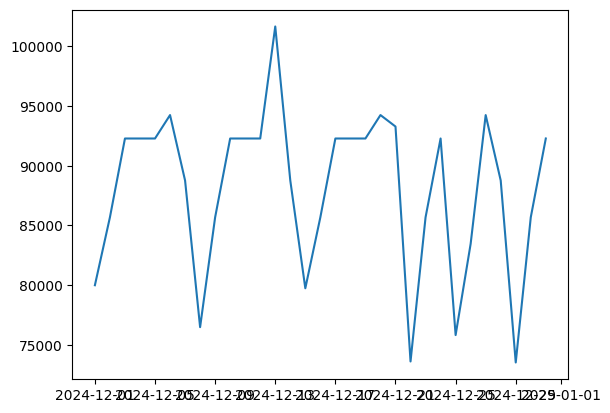

In [37]:
plt.plot(df["date"],df["car_count"])
plt.show()

In [38]:
# rename dataframe
df_car = df

## Cars vs pollution

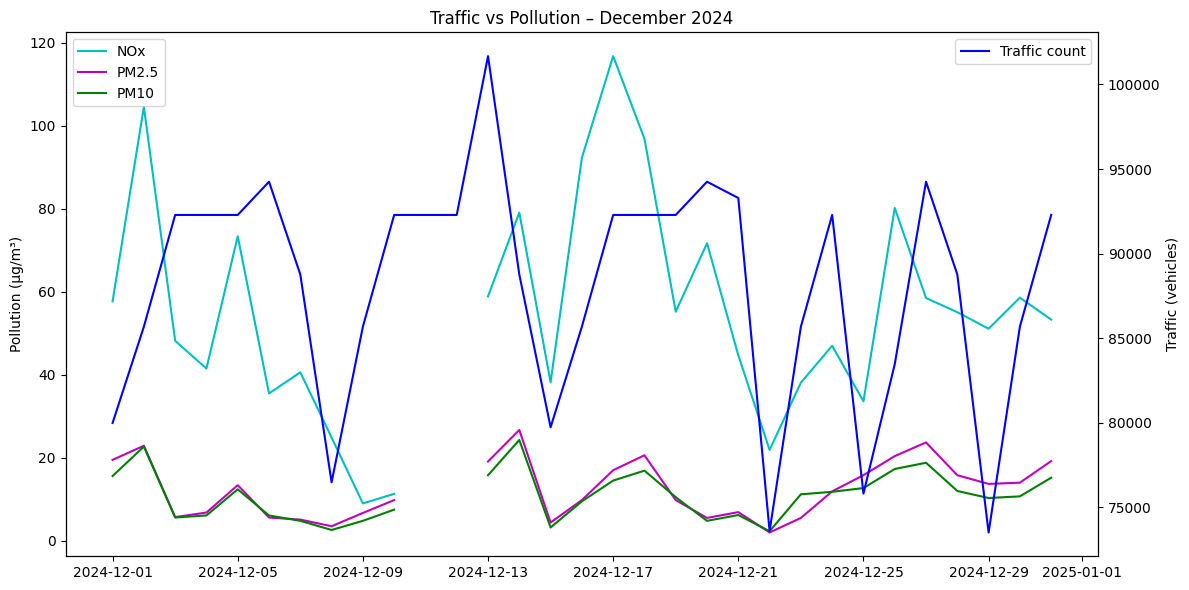

In [50]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_car["date"], nox_daily["Härkingen-A1"], "c", label="NOx")
ax1.plot(df_car["date"], pm25_daily["Härkingen-A1"], "m", label="PM2.5")
ax1.plot(df_car["date"], pm10_daily["Härkingen-A1"], "g", label="PM10")
ax1.set_ylabel("Pollution (µg/m³)")
ax1.tick_params(axis="y")
plt.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(df_car["date"], df_car["car_count"], "b", label="Traffic count")
ax2.set_ylabel("Traffic (vehicles)")
ax2.tick_params(axis="y")

plt.title("Traffic vs Pollution – December 2024")
fig.tight_layout()
plt.legend()
plt.show()
